<a href="https://colab.research.google.com/github/TanChen168/Project2/blob/main/Project2_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Definitions

Frequent consumption of high caloric food (FAVC)
Frequency of consumption of vegetables (FCVC)
Number of main meals (NCP)
Consumption of food between meals (CAEC)
Consumption of water daily (CH20)
Consumption of alcohol (CALC)
Calories consumption monitoring (SCC)
Physical activity frequency (FAF)
Time using technology devices (TUE)
Transportation used (MTRANS)

# Libraries Initialization

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Loading and reviewing data imported

In [98]:
filename = '/content/sample_data/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(filename)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [100]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

# Data Cleansing

In [101]:
# Format nominal Data (y/n and f/m), others will be handled by OHE

df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0})
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].replace({'yes': 1, 'no': 0})


In [102]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

# Perform Train-Test-Split and Pipeline preparations

In [103]:
# Perform Test-Train-Split
X = df.drop(columns = ['NObeyesdad'])
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [104]:
# Create categorical and numeric selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [105]:
# Object initialization
median_imputer = SimpleImputer(strategy = 'median')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Create pipeline for numeric columns
num_pipe = make_pipeline(median_imputer, scaler)

# Create pipeline for categorical columns
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

# Create column transformers
column_transformer = make_column_transformer(num_tuple, cat_tuple)
column_transformer.fit(X_train)

# Transform train and test set
X_train_processed = column_transformer.transform(X_train)
X_test_processed = column_transformer.transform(X_test)

# Data Visualizations (Heatmap and Clusters)

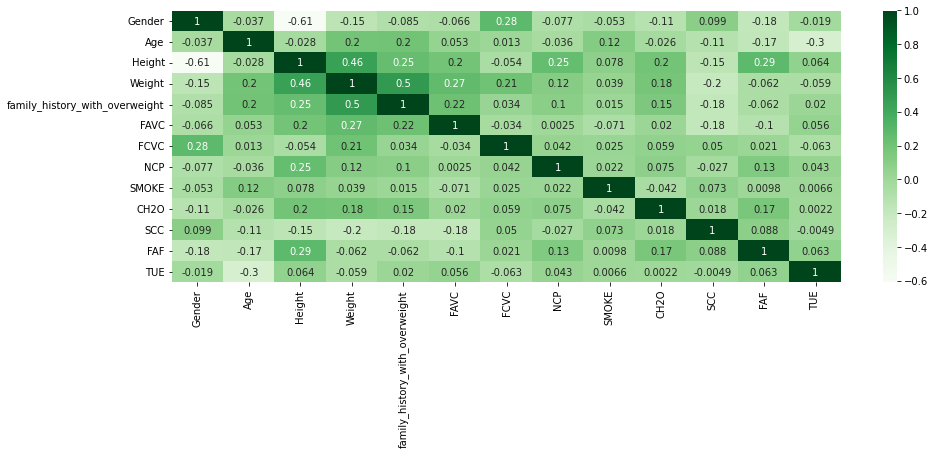

In [106]:
# Create correlation heatmap
fig, ax = plt.subplots(figsize=(15, 5))
corr = X_train.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

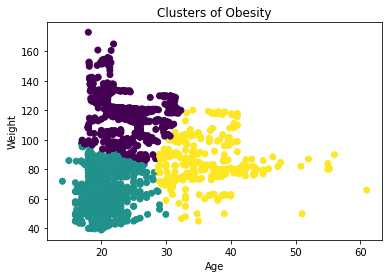

In [107]:
# Create a univariate visuals for the features
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})
df_x = df[['Age', 'Weight']]

# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data.
scaled_df = scaler.fit_transform(df_x)

# Visualize the clusters

kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)

df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Age'], df['Weight'], c = df['cluster'])
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Clusters of Obesity');

# Silhouette Scores

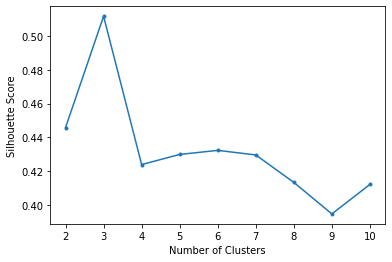

In [108]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');


# KNN

In [109]:
# Import Library
from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn = KNeighborsClassifier(n_neighbors=3)

# Create pipeline and train the model using train data
knn_pipe = make_pipeline(knn)
knn_pipe.fit(X_train_processed, y_train)

# Run model predictions using test data
predictions = knn_pipe.predict(X_test_processed)
predictions

print('Training accuracy:', knn_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', knn_pipe.score(X_test_processed, y_test))

Training accuracy: 0.9115603284902085
Testing accuracy: 0.8257575757575758


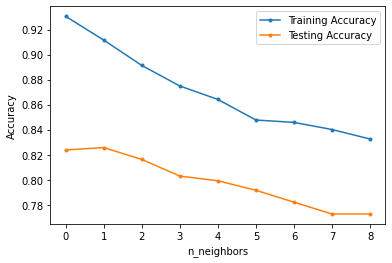

In [110]:
#Loop through k values and store the scores in the list.
train_scores = []
test_scores = []
for k in range(2,11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_pipe = make_pipeline(knn)
  knn_pipe.fit(X_train_processed, y_train)
  predictions = knn_pipe.predict(X_test_processed)
  
  train_scores.append(knn_pipe.score(X_train_processed, y_train))
  test_scores.append(knn_pipe.score(X_test_processed, y_test))
  
#Visualize scores
plt.plot(train_scores, marker = '.', label='Training Accuracy')
plt.plot(test_scores, marker = '.', label='Testing Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

# Logistic Regression

In [111]:
# Import Library
from sklearn.linear_model import LogisticRegression

# Initialize Model
logreg = LogisticRegression(C = 1000)

# Create pipeline and train the model using train data and run the model
scaler = StandardScaler()
logreg_pipe = make_pipeline(logreg)
logreg_pipe.fit(X_train_processed,y_train)
predictions = logreg_pipe.predict(X_test_processed)
predictions

print('Training accuracy:', logreg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test_processed, y_test))

Training accuracy: 0.9905243209096652
Testing accuracy: 0.9526515151515151


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


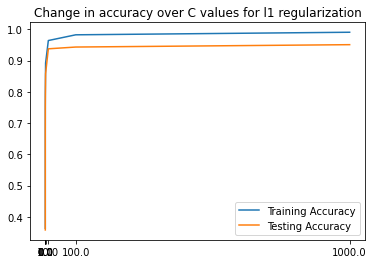

In [112]:
#Loop through c values and store the scores in the list.
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c)
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train_processed, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

# Initializing Boosting Classifiers

In [113]:
# Import Libraries
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# XGB Boosting

In [114]:
# Initialize model, train and predict
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)
xgbPredictions = xgb.predict(X_test_processed)

# Show reports
print('Training accuracy:', xgb.score(X_train_processed, y_train))
print('Testing accuracy:', xgb.score(X_test_processed, y_test))

Creport = classification_report(y_test, xgbPredictions)
print(Creport)

Training accuracy: 0.9974731522425774
Testing accuracy: 0.9450757575757576
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.94        68
      Normal_Weight       0.90      0.85      0.87        78
     Obesity_Type_I       0.98      0.95      0.96        94
    Obesity_Type_II       0.96      0.99      0.97        75
   Obesity_Type_III       1.00      0.99      0.99        79
 Overweight_Level_I       0.87      0.92      0.89        71
Overweight_Level_II       0.97      0.98      0.98        63

           accuracy                           0.95       528
          macro avg       0.94      0.95      0.94       528
       weighted avg       0.95      0.95      0.94       528



# LGBM Boosting

In [115]:
# Initialize model, train and predict
lgbm = LGBMClassifier(max_depth = 6)
lgbm.fit(X_train_processed, y_train)
lgbmPredictions = lgbm.predict(X_test_processed)

# Show reports
print('Training accuracy:', lgbm.score(X_train_processed, y_train))
print('Testing accuracy:', lgbm.score(X_test_processed, y_test))

Creport = classification_report(y_test, lgbmPredictions)
print(Creport)

Training accuracy: 1.0
Testing accuracy: 0.9602272727272727
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.99      0.95        68
      Normal_Weight       0.94      0.85      0.89        78
     Obesity_Type_I       0.99      0.97      0.98        94
    Obesity_Type_II       0.97      0.99      0.98        75
   Obesity_Type_III       1.00      0.99      0.99        79
 Overweight_Level_I       0.89      0.96      0.93        71
Overweight_Level_II       1.00      1.00      1.00        63

           accuracy                           0.96       528
          macro avg       0.96      0.96      0.96       528
       weighted avg       0.96      0.96      0.96       528



# GBC Boosting

In [116]:
# Initialize model, train and predict
gbc = GradientBoostingClassifier()
gbc.fit(X_train_processed, y_train)
gbcmPredictions = lgbm.predict(X_test_processed)

# Show reports
print('Training accuracy:', gbc.score(X_train_processed, y_train))
print('Testing accuracy:', gbc.score(X_test_processed, y_test))
Creport = classification_report(y_test, gbcmPredictions)
print(Creport)

Training accuracy: 1.0
Testing accuracy: 0.9450757575757576
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.99      0.95        68
      Normal_Weight       0.94      0.85      0.89        78
     Obesity_Type_I       0.99      0.97      0.98        94
    Obesity_Type_II       0.97      0.99      0.98        75
   Obesity_Type_III       1.00      0.99      0.99        79
 Overweight_Level_I       0.89      0.96      0.93        71
Overweight_Level_II       1.00      1.00      1.00        63

           accuracy                           0.96       528
          macro avg       0.96      0.96      0.96       528
       weighted avg       0.96      0.96      0.96       528



In [117]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# PCA Visualization

In [131]:
X = df.drop(columns= ['CAEC', 'CALC', 'MTRANS'])
le = LabelEncoder()
y = le.fit_transform(df['NObeyesdad'])

In [135]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)
# Instantiate, fit & transform data using PCA
pca = PCA(n_components=15)
pcs = pca.fit_transform(scaled_df)

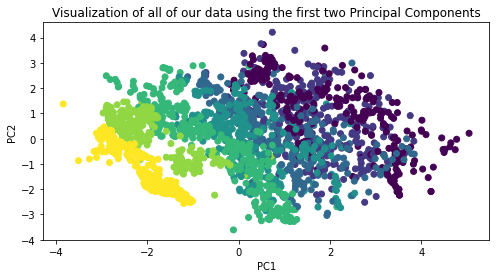

In [133]:
# Visualize the first 2 PCs
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of all of our data using the first two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

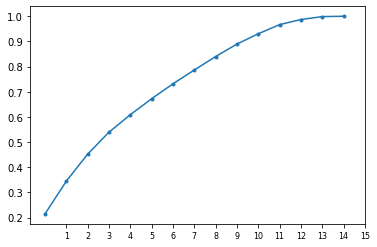

In [137]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,16), fontsize=8);


In [139]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=15))
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train_processed, y_train)
print('Training accuracy:', logreg_pipe.score(X_train_processed, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test_processed, y_test))

Training accuracy: 0.6430827542640556
Testing accuracy: 0.6534090909090909


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Logistic Regression is the selected model for now as other models seems overfit for the train dataset